Arabic Characters Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import os
import re
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
# Generate data paths with labels
train_data_dir = 'Arabic characters/Train Images 13440x32x32'
train_images = []
train_labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for image in filelist:
        fpath = os.path.join(foldpath, image)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        img = img / 255
        l = re.search(r'\d+(?=.png)', image).group()
        l_int = int(l) - 1
        train_images.append(img)
        train_labels.append(int(l_int))
        
# Concatenate data paths with labels into one dataframe
print(len(train_images))
print(len(train_labels))

13440
13440


In [3]:
# Generate data paths with labels
test_data_dir = 'Arabic characters/Test Images 3360x32x32'
test_images = []
test_labels = []

folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for image in filelist:
        fpath = os.path.join(foldpath, image)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        img = img / 255
        l = re.search(r'\d+(?=.png)', image).group()
        l_int = int(l) - 1
        test_images.append(img)
        test_labels.append(int(l_int))
        
# Concatenate data paths with labels into one dataframe
print(len(test_images))
print(len(test_labels))

3360
3360


In [4]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)

In [5]:
class_names = ('أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش','ص',
               'ض', 'ط', 'ظ','ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي')

In [6]:
# Input shape
input_shape = (32, 32, 1)

# Number of classes
num_classes = len(class_names)

In [7]:
train = np.stack(train_images)
val = np.stack(val_images)
test = np.stack(test_images)

train = train.reshape(-1, 32, 32, 1)
test = test.reshape(-1, 32, 32, 1)
val = val.reshape(-1, 32, 32, 1)

print(train.shape)
print(val.shape)
print(test.shape)

(11424, 32, 32, 1)
(2016, 32, 32, 1)
(3360, 32, 32, 1)


In [8]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
train_encoded_labels = label_encoder.fit_transform(train_labels)
val_encoded_labels = label_encoder.fit_transform(val_labels)
test_encoded_labels = label_encoder.fit_transform(test_labels)

# After converting labels to NumPy arrays
train_labels = to_categorical(train_encoded_labels, num_classes=num_classes)
val_labels = to_categorical(val_encoded_labels, num_classes=num_classes)
test_labels = to_categorical(test_encoded_labels, num_classes=num_classes)

In [9]:
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(11424, 28)
(2016, 28)
(3360, 28)


In [10]:
# Defining the model architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output for the fully connected layers
    layers.Flatten(),
        
    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

logits = model.predict(train)  # Assuming `train` is your training data
print('logits:',logits.shape)

# Train the model
history = model.fit(train, train_labels, epochs=30, batch_size=32, validation_data= (val, val_labels))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)        

<Figure size 2000x800 with 0 Axes>

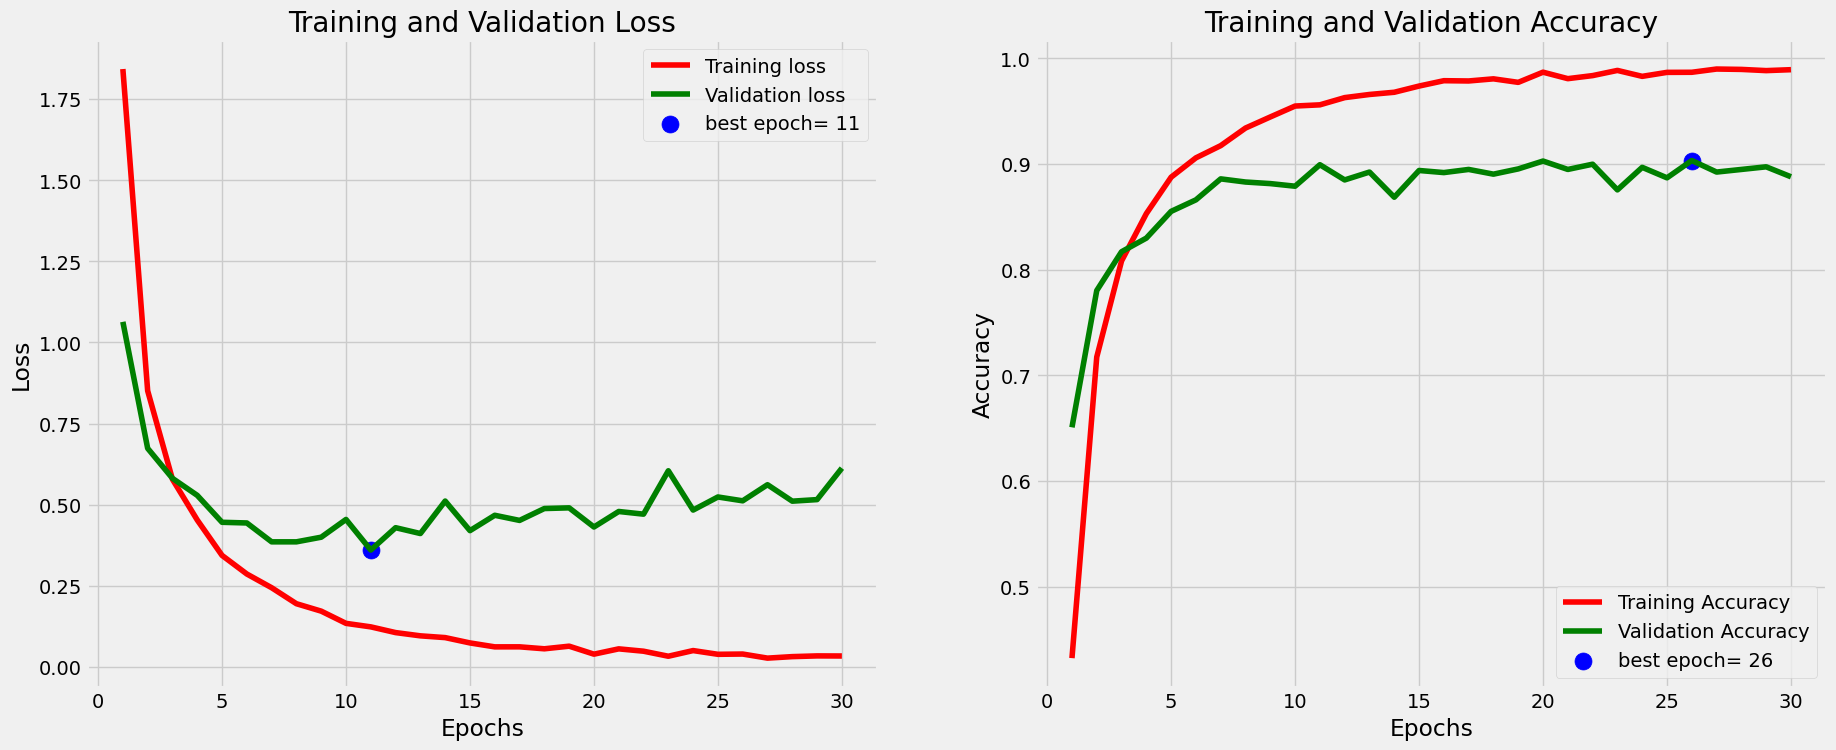

105/105 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.8908
Train Loss:  0.03706961125135422
Train Accuracy:  0.9857317805290222
--------------------
Validation Loss:  0.6127101182937622
Validation Accuracy:  0.8878968358039856
--------------------
Test Loss:  0.576209306716919
Test Accuracy:  0.8907738327980042


In [11]:
# Getting the best epoch
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate the model on the test data
train_loss, train_accuracy = model.evaluate(train, train_labels)
val_loss, val_accuracy = model.evaluate(val, val_labels)
test_loss, test_accuracy = model.evaluate(test, test_labels)

print("Train Loss: ", train_loss)
print("Train Accuracy: ", train_accuracy)
print('-' * 20)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_accuracy)
print('-' * 20)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

In [15]:
preds = model.predict(test)
predicted_classes = np.argmax(preds, axis=1)

105/105 [==============================] - 0s 3ms/step


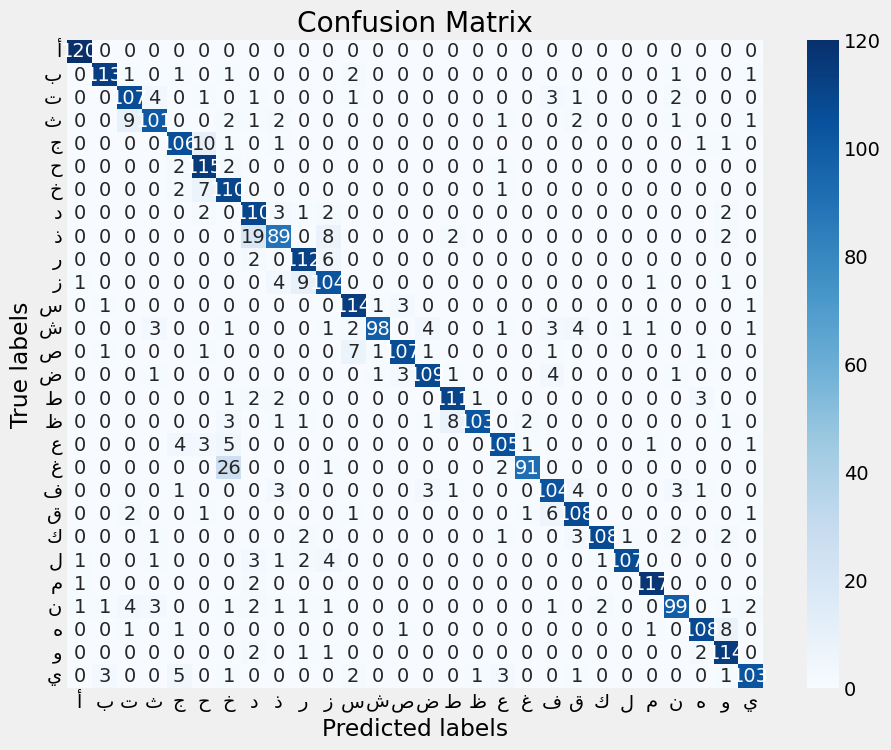

In [19]:
test_labels_categorical = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels_categorical, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Classification report
print(classification_report(test_labels_categorical, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

           أ       0.97      1.00      0.98       120
           ب       0.95      0.94      0.95       120
           ت       0.86      0.89      0.88       120
           ث       0.89      0.84      0.86       120
           ج       0.87      0.88      0.88       120
           ح       0.82      0.96      0.88       120
           خ       0.71      0.92      0.80       120
           د       0.76      0.92      0.83       120
           ذ       0.83      0.74      0.78       120
           ر       0.87      0.93      0.90       120
           ز       0.81      0.87      0.84       120
           س       0.88      0.95      0.92       120
           ش       0.97      0.82      0.89       120
           ص       0.94      0.89      0.91       120
           ض       0.92      0.91      0.92       120
           ط       0.90      0.93      0.91       120
           ظ       0.98      0.86      0.92       120
           ع       0.91    

In [22]:
#Save the model
model.save('Arabic_character_recognition.h5')

AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
loaded_model = tf.keras.models.load_model('Arabic_character_recognition1.h5', compile=False)
loaded_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

1/1 [==============================] - 0s 27ms/step
4
ج


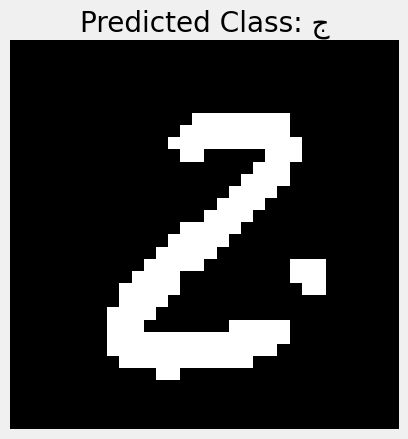

In [29]:
# Load the image
image = cv2.imread('Arabic characters/Test Images 3360x32x32/test/id_10_label_5.png', cv2.IMREAD_GRAYSCALE)

# Preprocess the image
img = cv2.resize(image, (32, 32))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make predictions
predictions = loaded_model.predict(img)
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print(predicted_class_index)
print(predicted_class)

# Display the image with the predicted class
plt.imshow(img.reshape(32, 32), cmap='gray') 
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()